In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'

In [2]:
# 幾何（上が媒質1、下が媒質2。境界は y=0）
xA, yA = -2.0,  2.0   # 出発点 A (上側)
xB, yB =  3.0, -1.5   # 到着点 B (下側)

# 屈折率（例：空気→水）
n1 = 1.00   # 上側
n2 = 1.33   # 下側
c  = 3e8    # 真空中の光速（定数。相対比較なので消えてもOK）


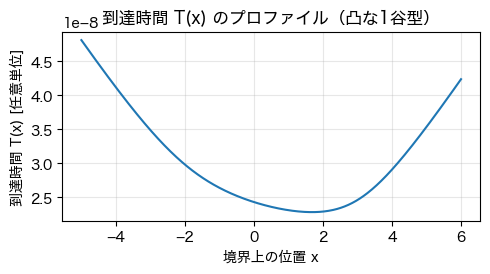

In [9]:
def travel_time(x):
    # 境界上の通過点 P=(x, 0)
    AP = np.hypot(x - xA, 0 - yA)  # 距離
    PB = np.hypot(xB - x, yB - 0)
    return (n1*AP + n2*PB) / c

# 点列を走査
xs = np.linspace(min(xA, xB) - 3, max(xA, xB) + 3, 500)
Ts = np.array([travel_time(x) for x in xs])

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(xs, Ts)
ax.set_xlabel("境界上の位置 x")
ax.set_ylabel("到達時間 T(x) [任意単位]")
ax.set_title("到達時間 T(x) のプロファイル（凸な1谷型）")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
i_min = np.argmin(Ts)
# x_star_bruteforce = xs[i_min]
x_star = xs[i_min]
T_star = Ts[i_min]
# print(f"x* (粗い) ≈ {x_star_bruteforce:.4f},   T* ≈ {T_star:.4e}")


In [ ]:
# def dTdx(x):
#     AP = np.hypot(x - xA, 0 - yA)
#     PB = np.hypot(xB - x, 0 - yB)
#     return (n1*(x - xA)/AP - n2*(xB - x)/PB) / c

# def d2Tdx2(x):
#     AP2 = (x - xA)**2 + yA**2
#     PB2 = (xB - x)**2 + yB**2
#     return (n1 * (yA**2) / AP2**(3/2) + n2 * (yB**2) / PB2**(3/2)) / c

# # ニュートン法
# x = x_star_bruteforce  # 総当たりの結果を初期値に
# for _ in range(20):
#     x -= dTdx(x) / d2Tdx2(x)
# x_star = x
# print(f"x* (ニュートン) ≈ {x_star:.6f}, T* ≈ {travel_time(x_star):.6e}")


x* (ニュートン) ≈ 1.680025, T* ≈ 2.281946e-08


In [11]:
AP = np.hypot(x_star - xA, yA)
PB = np.hypot(xB - x_star, -yB)  # yB<0 を考慮
sin1 = abs(x_star - xA) / AP
sin2 = abs(xB - x_star) / PB

lhs = n1 * sin1
rhs = n2 * sin2
print(f"n1*sin(theta1) ≈ {lhs:.6f},   n2*sin(theta2) ≈ {rhs:.6f},   差 = {abs(lhs-rhs):.2e}")


n1*sin(theta1) ≈ 0.878590,   n2*sin(theta2) ≈ 0.878876,   差 = 2.86e-04


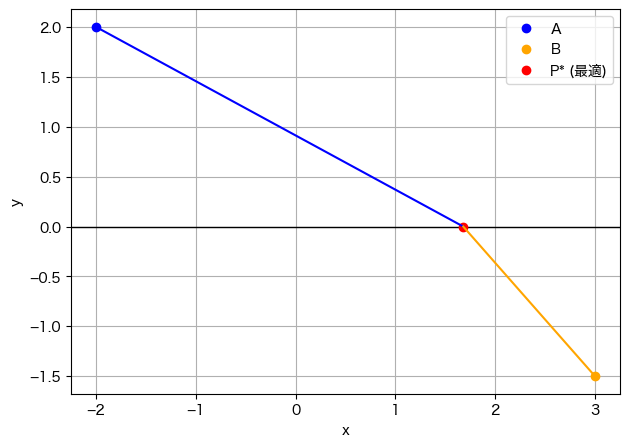

In [19]:
fig, ax = plt.subplots()
# 境界
ax.axhline(0, color='k', lw=1)
# 点と最適通過点
ax.plot([xA], [yA], 'o', label='A', color='blue')
ax.plot([xB], [yB], 'o', label='B', color='orange')
ax.plot([x_star], [0], 'o', label='P* (最適)', color='red')

# 経路
ax.plot([xA, x_star], [yA, 0], '-', color='blue')
ax.plot([x_star, xB], [0, yB], '-', color='orange')

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()
